<a href="https://colab.research.google.com/github/Sumaira-Ashraf/word-embeddings/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install tensorflow
!pip install numpy
!pip install pandas

In [24]:
import os
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [25]:
import keras
keras.__version__

'3.5.0'

In [65]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split
from keras.models import Model
#from sklearn.preprocessing import LabelEncoder


# Load CSV file
csv_file_path = "/content/processed_IMDB_Dataset.csv"  # Replace with your file path
data = pd.read_csv(csv_file_path)

# Extract text and labels
texts = data['text'].astype(str).tolist()
labels = data['sentiment'].tolist()

# Convert labels to numerical format (0 and 1)
# Create a dictionary to map sentiment labels to numerical values
label_mapping = {'negative': 0, 'positive': 1}
# Use the dictionary to convert the labels in your list
labels = [label_mapping[label] for label in labels]

# Convert labels to numpy array
labels = np.array(labels)

# Split the data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    texts, labels, test_size=0.2, random_state=42
)

# Tokenize the text
max_words = 10000  # Use the top 10,000 words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)

# Pad the sequences
maxlen = 100  # Limit to 100 words per text
train_data = pad_sequences(train_sequences, maxlen=maxlen)
val_data = pad_sequences(val_sequences, maxlen=maxlen)

# Prepare the embedding layer
embedding_dim = 100
embedding_index = {}

# Load pre-trained word embeddings (GloVe example)
glove_path = "/content/glove.6B.100d.txt"
with open(glove_path, encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Prepare the embedding matrix
word_index = tokenizer.word_index
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
# Build the model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen, weights=[embedding_matrix], trainable=False))  # Load pre-trained embeddings here
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))









# Compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_data, val_labels)
)

# Save the trained model
model_save_path = '/content/glove6B100d_model.h5'  # Update with your desired file path
model.save(model_save_path)

print(f"Model saved to {model_save_path}")


# Evaluate the model
test_loss, test_acc = model.evaluate(val_data, val_labels)
print(f"Validation Accuracy: {test_acc:.2f}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6103 - loss: 0.6879 - val_accuracy: 0.7368 - val_loss: 0.5581
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7543 - loss: 0.5263 - val_accuracy: 0.7453 - val_loss: 0.5181
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7867 - loss: 0.4591 - val_accuracy: 0.7441 - val_loss: 0.5263
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7989 - loss: 0.4333 - val_accuracy: 0.7220 - val_loss: 0.5776
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8187 - loss: 0.4068 - val_accuracy: 0.7385 - val_loss: 0.5404
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8248 - loss: 0.3906 - val_accuracy: 0.7389 - val_loss: 0.5561
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8375 - loss: 0.3679 - val_accuracy: 0.7325 - val_loss: 0.5874
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8458 - loss: 0.3493 - val_ac

Model saved to /content/glove6B100d_model.h5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7270 - loss: 0.7041
Validation Accuracy: 0.73


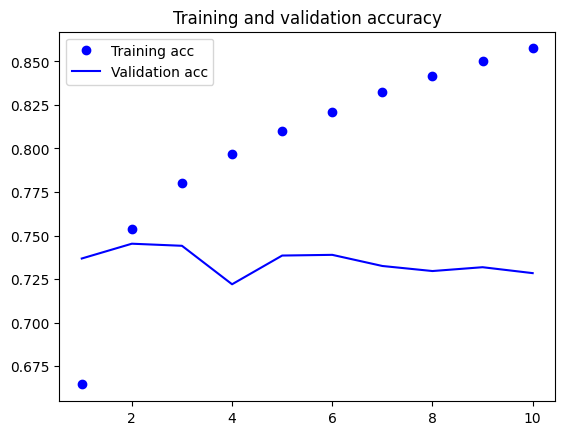

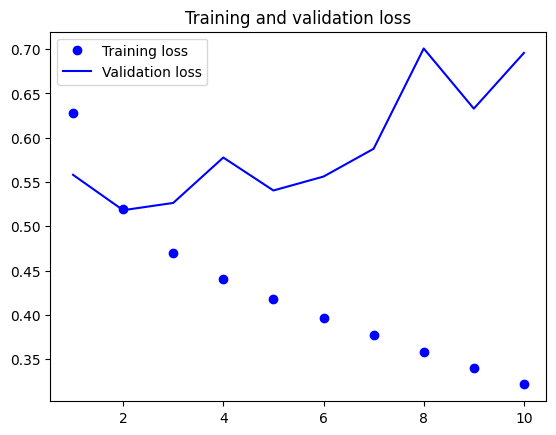

In [67]:


import matplotlib.pyplot as plt

# Access accuracy and loss values using 'accuracy' and 'val_accuracy' keys
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [71]:


model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.build(input_shape=(None, maxlen))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_data,
    train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_data, val_labels))

Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_33 (Embedding)             │ (None, 100, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_26 (Flatten)                 │ (None, 10000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 32)                  │         320,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,320,065 (5.04 MB)

 Trainable params: 1,320,065 (5.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 18ms/step - acc: 0.7387 - loss: 0.4969 - val_acc: 0.8506 - val_loss: 0.3352
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 18ms/step - acc: 0.9238 - loss: 0.1981 - val_acc: 0.8424 - val_loss: 0.4019
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 25s 20ms/step - acc: 0.9882 - loss: 0.0399 - val_acc: 0.8297 - val_loss: 0.6349
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 17ms/step - acc: 0.9986 - loss: 0.0053 - val_acc: 0.8300 - val_loss: 0.9029
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - acc: 0.9998 - loss: 7.4234e-04 - val_acc: 0.8254 - val_loss: 1.0289
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - acc: 1.0000 - loss: 1.2107e-04 - val_acc: 0.8301 - val_loss: 1.0872
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - acc: 1.0000 - loss: 2.0986e-05 - val_acc: 0.8300 - val_loss: 1.1147
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 43s 19ms/step - acc: 1.0000 - loss: 1.0131e-05 - val_acc: 0.8310 - val_loss: 1.1268
Epoch 9/

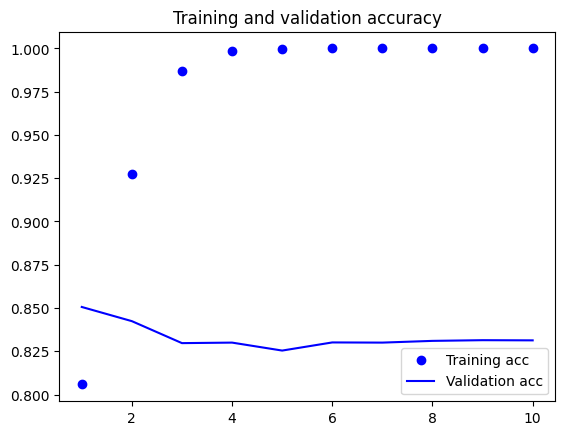

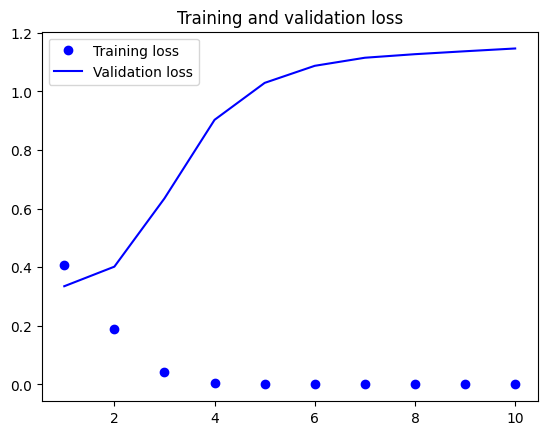

In [72]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [75]:



# Load the CSV file
csv_file_path = "/content/processed_IMDB_Dataset.csv"  # Replace with the actual path
data = pd.read_csv(csv_file_path)

# Extract the reviews (texts) and their corresponding labels
texts = data['text'].astype(str).tolist()  # Convert text column to a list
labels = data['sentiment'].tolist()  # Convert label column to a list

# Tokenize the text
max_words = 10000  # Use the top 10,000 most frequent words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)



# Check the shapes of the processed data
print(f"x_test shape: {train_data.shape}")
print(f"y_test shape: {val_data.shape}")

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

x_test shape: (40000, 100)
y_test shape: (10000, 100)


In [77]:
label_mapping = {'negative': 0, 'positive': 1}  # Create a mapping dictionary
y_test = np.array([label_mapping[label] for label in labels])

model.load_weights('/content/glove6B100d_model.h5')
model.evaluate(x_test, y_test)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - acc: 0.5999 - loss: 0.9382


[0.9400806427001953, 0.5985999703407288]

The training result suggests that the model's accuracy is 59.86% and the loss is 0.9382. Here's what it means and some potential actions to improve the performance:

# **A first recurrent layer in Keras**

# the SimpleRNN layer

In [80]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

# Define the model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32, input_length=100))  # Specify input_length
model.add(SimpleRNN(32))

# Build the model explicitly
model.build(input_shape=(None, 100))  # (batch_size, sequence_length)

# Print the model summary
model.summary()

Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_36 (Embedding)             │ (None, 100, 32)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,080 (1.23 MB)

 Trainable params: 322,080 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
# Build the model explicitly
model.build(input_shape=(None, None))
model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_38 (Embedding)             │ (None, None, 32)            │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, None, 32)            │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,080 (1.23 MB)

 Trainable params: 322,080 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))  # This last layer only returns the last outputs.
model.build(input_shape=(None, None))
model.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_40 (Embedding)             │ (None, None, 32)            │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_9 (SimpleRNN)             │ (None, None, 32)            │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_10 (SimpleRNN)            │ (None, None, 32)            │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_11 (SimpleRNN)            │ (None, None, 32)            │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_12 (SimpleRNN)            │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 328,320 (1.25 MB)

 Trainable params: 328,320 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

# **Now let's use such a model on the IMDB movie review classification problem. First, let's preprocess the data:**

In [85]:
# Load the CSV file
csv_file_path = "/content/processed_IMDB_Dataset.csv"  # Replace with the actual path
data = pd.read_csv(csv_file_path)

# Extract the reviews (texts) and their corresponding labels
texts = data['text'].astype(str).tolist()  # Convert text column to a list
labels = data['sentiment'].tolist()  # Convert label column to a list

# Tokenize the text
max_words = 10000  # Use the top 10,000 most frequent words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)



# Check the shapes of the processed data
print(f"x_test shape: {train_data.shape}")
print(f"y_test shape: {val_data.shape}")

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

x_test shape: (40000, 100)
y_test shape: (10000, 100)


In [87]:
from tensorflow.keras.layers import Dense

# Convert string labels to numerical labels (0 and 1)
label_mapping = {'negative': 0, 'positive': 1}  # Create a mapping dictionary
y_test = np.array([label_mapping[label] for label in labels]) # Convert labels to numerical using the mapping

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_test, y_test,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 50ms/step - acc: 0.6304 - loss: 0.6118 - val_acc: 0.8352 - val_loss: 0.3997
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - acc: 0.8550 - loss: 0.3472 - val_acc: 0.8478 - val_loss: 0.3877
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - acc: 0.8863 - loss: 0.2850 - val_acc: 0.8569 - val_loss: 0.3491
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - acc: 0.9071 - loss: 0.2412 - val_acc: 0.8341 - val_loss: 0.3948
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step - acc: 0.9305 - loss: 0.1878 - val_acc: 0.8451 - val_loss: 0.4646
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - acc: 0.9510 - loss: 0.1395 - val_acc: 0.8383 - val_loss: 0.4497
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 55ms/step - acc: 0.9710 - loss: 0.0910 - val_acc: 0.8370 - val_loss: 0.5093
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 45ms/step - acc: 0.9818 - loss: 0.0588 - val_acc: 0.8279 - val_loss: 0.5958
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 

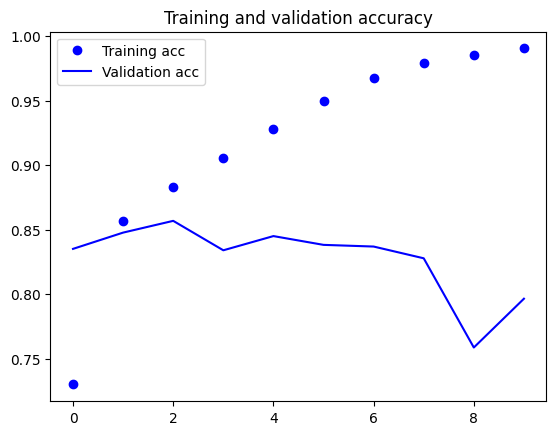

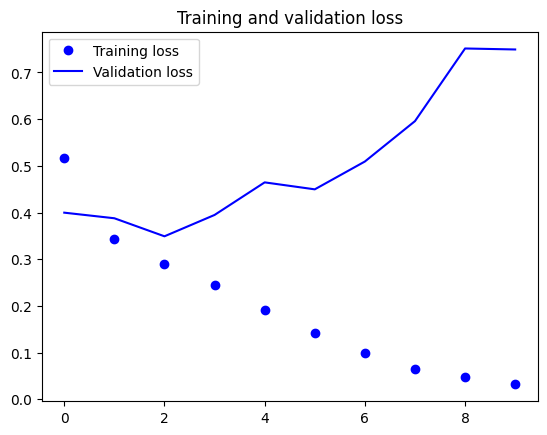

In [88]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **LSTM  in Keras**

In [90]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_test, y_test,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - acc: 0.6625 - loss: 0.5863 - val_acc: 0.8329 - val_loss: 0.3807
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - acc: 0.8625 - loss: 0.3341 - val_acc: 0.8498 - val_loss: 0.3497
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - acc: 0.8847 - loss: 0.2824 - val_acc: 0.8260 - val_loss: 0.4189
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - acc: 0.8983 - loss: 0.2562 - val_acc: 0.8521 - val_loss: 0.3539
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 99ms/step - acc: 0.9068 - loss: 0.2357 - val_acc: 0.8528 - val_loss: 0.3462
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 86ms/step - acc: 0.9200 - loss: 0.2114 - val_acc: 0.8449 - val_loss: 0.3964
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - acc: 0.9254 - loss: 0.1987 - val_acc: 0.8570 - val_loss: 0.3842
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - acc: 0.9320 - loss: 0.1853 - val_acc: 0.8533 - val_loss: 0.3558
Epoch 9/10
313/313 ━━━━━━━━━━━━━━━━━━━━

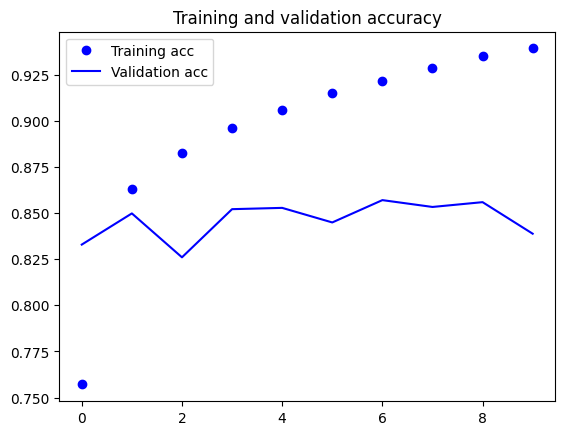

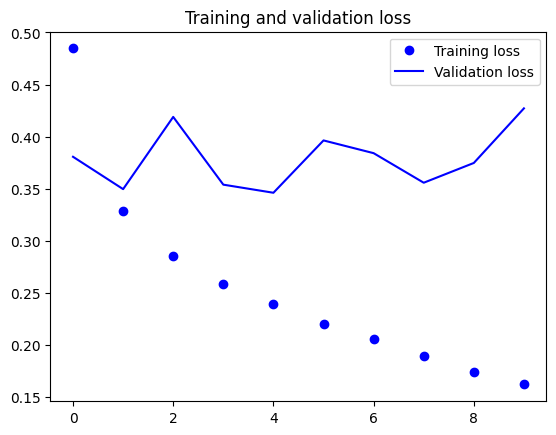

In [91]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()